# Assignment 1: **Linear Regression**
## Task
*Find an interesting dataset for linear regression on Kaggle. Implement the normal equations and gradient descent then evaluate your model's performance.*

*Write a brief report on your experiments and results in the form of a Jupyter notebook.*

*Your report is due before the next lab session on Aug 18.*

## Dataset
The dataset I have chosen for this assignment is taken from [this link](https://www.kaggle.com/neuromusic/avocado-prices/data). I will be attempting to create a linear model predicting the price of avocados.

In [1]:
# import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt

Out of all the columns available I selected "year of harvest" and "type" (organic or conventional) to be the independent variable which then is used to approximate the price of the avocado.

In [2]:
#import raw data
raw_data = np.genfromtxt('resources/avocado.csv', delimiter=",", dtype=str)
#delete irrelevant data for linear regression
selected_raw_data = np.delete(raw_data, [0,1,3,4,5,6,7,8,9,10,13],1)
#get the headers
headers = selected_raw_data[0]
#delete the first row containing the headers
selected_raw_data = np.delete(selected_raw_data, 0,0)
#convert "organic" and "conventional" to their respective unique integers
types, indexed_type = np.unique(selected_raw_data[:,1], return_inverse=True)
selected_raw_data[:,1] = indexed_type
print("Types [0,1]:")
print(types)
#convert selected data to float
data = np.array(selected_raw_data[1:,:],dtype=float)
print("Data:")
print(data)

Types [0,1]:
['conventional' 'organic']
Data:
[[1.350e+00 0.000e+00 2.015e+03]
 [9.300e-01 0.000e+00 2.015e+03]
 [1.080e+00 0.000e+00 2.015e+03]
 ...
 [1.870e+00 1.000e+00 2.018e+03]
 [1.930e+00 1.000e+00 2.018e+03]
 [1.620e+00 1.000e+00 2.018e+03]]


['AveragePrice' 'type' 'year']


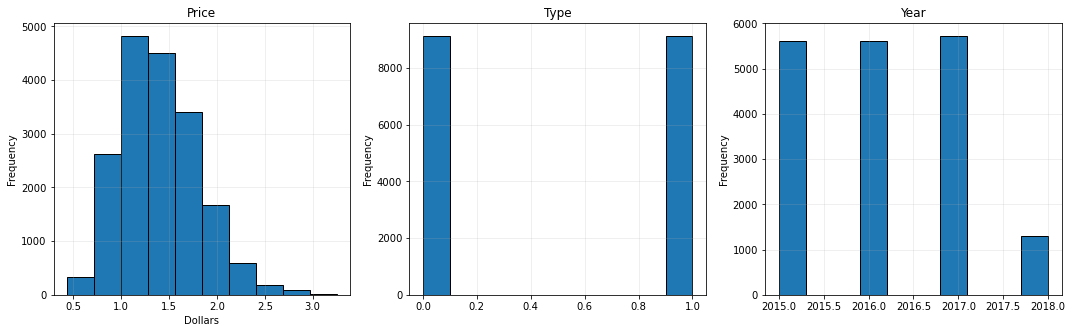

In [3]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)

plt1.hist(data[:,0], edgecolor='black')
plt1.set_title('Price')
plt1.set_xlabel('Dollars')
plt1.set_ylabel('Frequency')
plt1.grid(axis='both', alpha=.25)

plt2.hist(data[:,1], edgecolor='black')
plt2.set_title('Type')
plt2.set_xlabel('')
plt2.set_ylabel('Frequency')
plt2.grid(axis='both', alpha=.25)

plt3.hist(data[:,2], edgecolor='black')
plt3.set_title('Year')
plt3.set_xlabel('')
plt3.set_ylabel('Frequency')
plt3.grid(axis='both', alpha=.25)

print(headers)
plt.show()

## Gradient Descent
In order to perform gradient descent, the data is normalized in order to prevent errors which can arise from the difference in scale.

In [4]:
#Normalizing data
mean = np.mean(data,axis=0)
std = np.std(data,axis=0)
data_norm = (data-mean)/std

yy = data_norm[:,0]
X = data_norm[:,1:]
X = np.insert(X, 0, 1, axis=1)

n = X.shape[0]
m = X.shape[1]
yy = yy.reshape(n,1)

The following functions will be used to perform gradient decent.

In [5]:
def gradient(X, y, theta):
    grad = X.T@(X@theta-y)
    return grad

def cost(theta, X, y):
    return (X@theta - y).T@(X@theta - y)/(2*n)

def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    theta = theta_initial
    for i in np.arange(num_iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad
        J_per_iter[i] = cost(theta, X, y)
        gradient_per_iter[i] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

The parameters *Theta* are then found using the gradient descent algorithm with learning rate *alpha* set to 0.0001, iterations set to 30.

In [6]:
theta_initial = np.zeros((m,1))
alpha = 0.0001
iterations = 30
theta_gradient_decent,cost_,grad = gradient_descent(X,yy,theta_initial,alpha,iterations)
print('Gradient Decent Theta:\n', theta_gradient_decent)

Gradient Decent Theta:
 [[1.26084920e-14]
 [6.13957943e-01]
 [9.29735285e-02]]


The following plot visualizes the cost and the iterations.

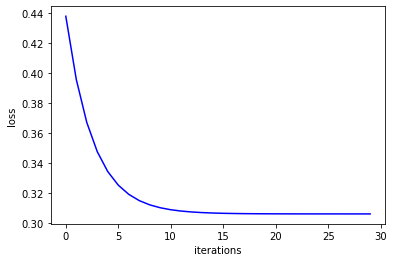

In [7]:
x_loss = np.arange(0,iterations,1)

plt.plot(x_loss,cost_,'b-')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

Theta is then analytically calculated to confirm the gradient descent algorithm. The analytical solution was found by finding the parameter values which makes the cost function's gradient be 0.

In [8]:
theta_normal_function = np.linalg.inv(X.T@X)@X.T@yy
print("Optimal Theta:\n",theta_normal_function)
print("Gradient at Theta(should be approximately 0):\n", gradient(X,yy, theta_normal_function))

Optimal Theta:
 [[1.12410081e-14]
 [6.15861289e-01]
 [9.32494441e-02]]
Gradient at Theta(should be approximately 0):
 [[1.98383532e-11]
 [4.52189397e-11]
 [2.03215222e-11]]


The *R Square* is then found to be approximately 0.39. This is a relatively low value which shows that a linear function may not be the most suitable function to predict the price from the selected independent variables.

In [9]:
y_predicted =  X@theta_gradient_decent
r_square = 1 - ((np.square(yy - y_predicted)).sum())/((np.square(yy - yy.mean())).sum())
print("R Square:",r_square)

R Square: 0.38796547568307815


##### According to this model, the price for an organic avocado harvested in the year 2020 is approximated to be **\$1.8066!**

In [10]:
example_year = 2020
example_type = 1
example_X = np.array([1,example_type,example_year])
prediction = (((example_X-mean)/std)@(theta_gradient_decent))*std[0]+mean[0]
print(prediction)

[1.80667081]


To conclude, this assignment has helped me understand how linear regression can be performed and evaluated.  